<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/ClassificationModels/t_distributed_stochastic_neighbor_embedding_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***What is t-SNE?***
t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008.

# ***t-SNE vs PCA***

The ***first thing*** to note is that PCA was developed in 1933 while t-SNE was developed in 2008

***Second thing*** PCA is a linear dimension reduction technique that seeks to maximize variance and preserves large pairwise distances.This can lead to poor visualization especially when dealing with non-linear manifold structures.

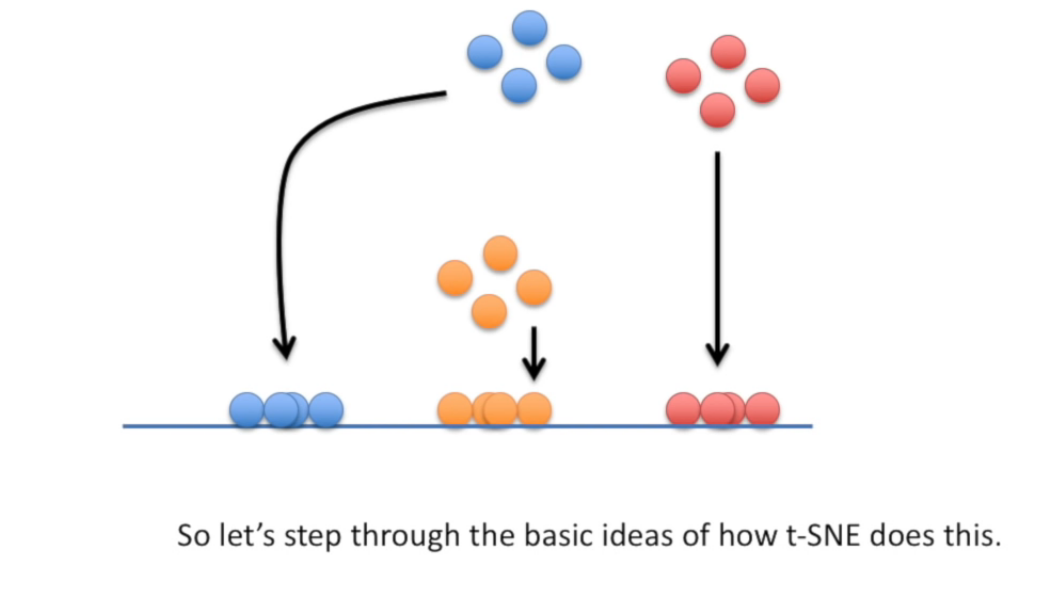

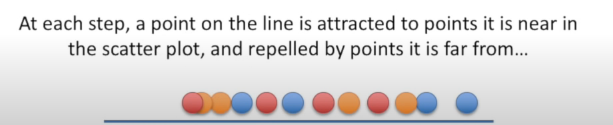

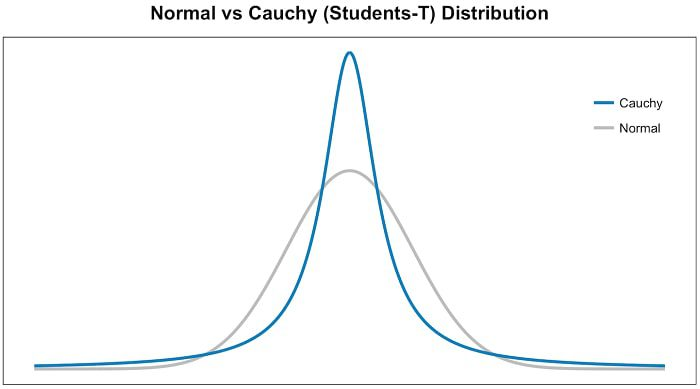

As you can see the Student t-distribution has heavier tails than the normal distribution. The heavy tails allow for better modeling of far apart distances.

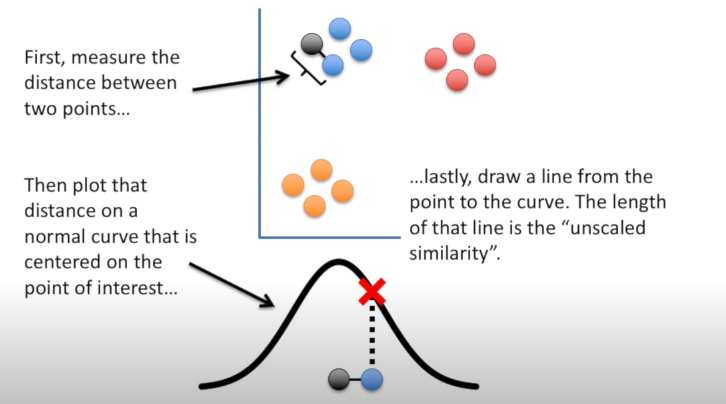

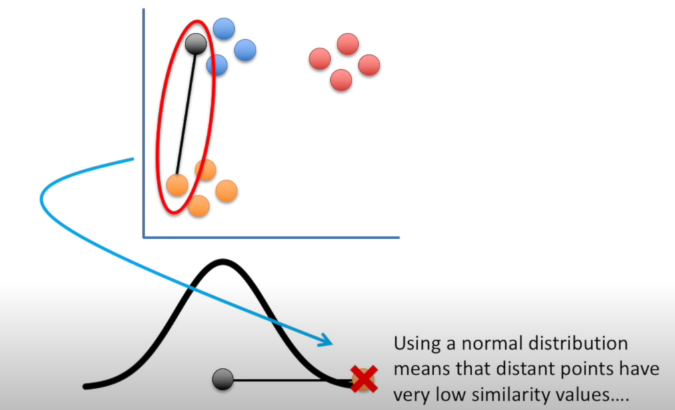

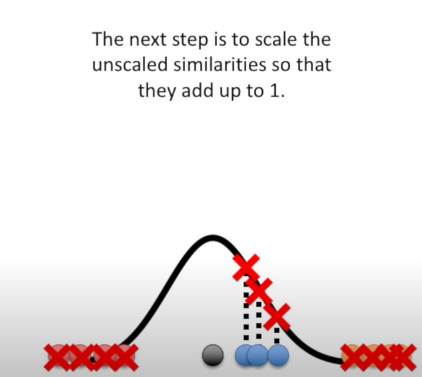

Detailed mathematical explaination on the following link
https://youtu.be/NEaUSP4YerM


# Library Section


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

# Data

In [3]:
data = datasets.fetch_openml('mnist_784', return_X_y=True,version=1)
pixel_values, targets = data
targets = targets.astype(int)


In [4]:
sampledf= pd.DataFrame(pixel_values)
print(sampledf.head(5))

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       

# Sample image

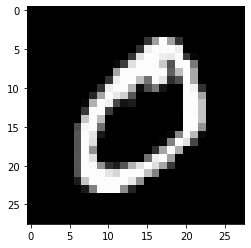

In [5]:
single_image = np.array(pixel_values.iloc[1]).reshape(28,28)
plt.imshow(single_image,cmap='gray')

# Explore the data


In [ ]:
import seaborn as sns
sns.heatmap(pixel_values.corr(), annot=True)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
train = StandardScaler().fit_transform(pixel_values)
pca = PCA(n_components=2)
pca_res = pca.fit_transform(train)

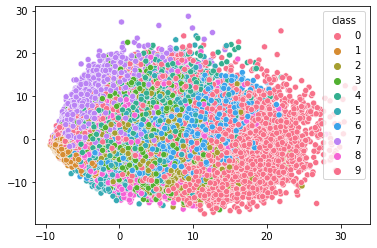

In [7]:
sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue = targets, palette = 'husl', legend = 'full')

# t-SNE transformed

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


# Plotting

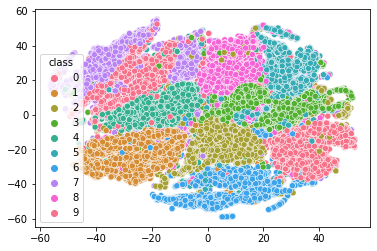

In [9]:
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = targets, palette = 'husl', legend = 'full')

# Limitations of TSNE



Unlike PCA, the cost function of t-SNE is non-convex, meaning there is a possibility that we would be stuck in a local minima.


Similar to other dimensionality reduction techniques, the meaning of the compressed dimensions as well as the transformed features becomes less interpretable.